#<font color="Green">Vision & Perception project</font>
**<font size=4>Filippo Betello 1835108</font>** <br>
In this project I used three different GANs: [DC Gan](https://arxiv.org/pdf/1511.06434.pdf), [Least Square GAN](https://arxiv.org/pdf/1611.04076.pdf) and [Relativistic GAN](https://arxiv.org/pdf/1807.00734.pdf). In order to understand their behavior under different condition, I performed training for 15 epochs and fixing batch size to 128. \\
In addition to that, I used three different optimizers [SGD](https://arxiv.org/pdf/1609.04747.pdf), [Adam](https://arxiv.org/pdf/1412.6980.pdf) and [AdaBound](https://arxiv.org/abs/1902.09843) with three different values for learning rate (0.01, 0.004, 0.0003).


## Installation of packages
Torch_optimizer can be deepened here [Torch_optimizer](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwjxi8T52aL2AhUa_bsIHTirASQQFnoECBIQAQ&url=https%3A%2F%2Fpytorch.org%2Fdocs%2Fstable%2Foptim.html&usg=AOvVaw3obblvWxBDMxjyy_1PNztf) and [here](https://pytorch-optimizer.readthedocs.io/en/latest/index.html).

In [1]:
#Torch optimizers installation: torch-optimizer – collection of optimizers for PyTorch compatible with optim module
print("\u001b[31m")
!pip install torch_optimizer

print("\u001b[31m[OK] Torch_optimizer package installed successfully")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 61 kB 448 kB/s 
[OK] Torch_optimizer package installed successfully


## Imports of libraries and dependencies 
Here are imported the libraries and dependencies used in the implementation.

In [2]:
#MatPlotLib and Numpy imports
import numpy as np #python library used for working with arrays
import matplotlib.pyplot as plt #cross-platform, data visualization and graphical plotting library for Python and its numerical extension numpy

#Torch imports
import torch #open-source machine learning framework: optimized tensor library primarily used for Deep Learning applications using GPUs and CPUs
import torch.nn as nn #modules and classes for neural networks, more here: https://pytorch.org/docs/stable/nn.html
import torch.optim as optim #a library implementing various optimization algorithms
import torch.nn.functional as F #functions like Pooling, Convolution, NonLinear
from torch import Tensor #tensors
from torch.utils.data import Dataset #dataset operations

#TorchVision imports
import torchvision #package consists of popular datasets, model architectures, and common image transformations for computer vision
import torchvision.transforms as transforms #tranformations on images
import torch.optim as optim #optimizations
from torchvision import datasets #dataset operations
from torchvision.datasets.folder import ImageFolder, default_loader #image folders management
from torchvision.transforms.transforms import Resize #resize of images
import torchvision.utils as vutils #contains various utilities, mostly for vizualization.
import torch_optimizer as optime #optimizersimport torch_optimizer as optime #optimizers


#Image visualization imports
from PIL import Image #library to save downloaded images and work on them

#Google Colab imports
from google.colab import drive #to mount Drive in Google Colab

print("\u001b[31m[OK] Libraries and dependencies imported successfully")

[OK] Libraries and dependencies imported successfully


In [3]:
print("\u001b[31m")
drive.mount('/content/drive', force_remount=True)
print("[OK] Drive mounted")


Mounted at /content/drive
[OK] Drive mounted


## Preparation of the dataset
⚠️ The pytorch dataset has a bug ⚠️: \\
<font color="red">`BadZipFile: File is not a zip file`</font> \\
I find another way to upload the images doing this:
1.   Copied in my Drive the repository from the [official site](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html);
2.   Accessing every time the file on drive would be very slow, so I create a directory in the current colab session and unzip the file there;
3. Using ImageFolder upload the images inside the Dataloader. \\
The whole process takes around 1 minute.




In [4]:
!mkdir 'celeb' #create a directory where I will put the images 

In [5]:
!unzip '/content/drive/MyDrive/GAN/CelebA/Img/img_align_celeba.zip' -d 'celeb' #unzip the images inside the folder

Output streaming troncato alle ultime 5000 righe.
 extracting: celeb/img_align_celeba/197600.jpg  
 extracting: celeb/img_align_celeba/197601.jpg  
 extracting: celeb/img_align_celeba/197602.jpg  
 extracting: celeb/img_align_celeba/197603.jpg  
 extracting: celeb/img_align_celeba/197604.jpg  
 extracting: celeb/img_align_celeba/197605.jpg  
 extracting: celeb/img_align_celeba/197606.jpg  
 extracting: celeb/img_align_celeba/197607.jpg  
 extracting: celeb/img_align_celeba/197608.jpg  
 extracting: celeb/img_align_celeba/197609.jpg  
 extracting: celeb/img_align_celeba/197610.jpg  
 extracting: celeb/img_align_celeba/197611.jpg  
 extracting: celeb/img_align_celeba/197612.jpg  
 extracting: celeb/img_align_celeba/197613.jpg  
 extracting: celeb/img_align_celeba/197614.jpg  
 extracting: celeb/img_align_celeba/197615.jpg  
 extracting: celeb/img_align_celeba/197616.jpg  
 extracting: celeb/img_align_celeba/197617.jpg  
 extracting: celeb/img_align_celeba/197618.jpg  
 extracting: celeb/

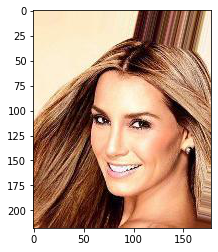

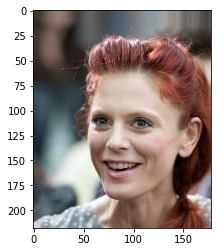

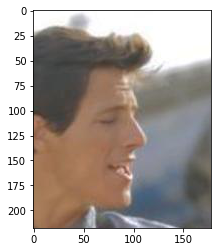

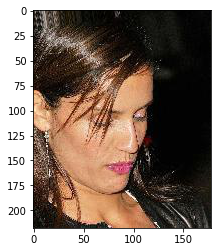

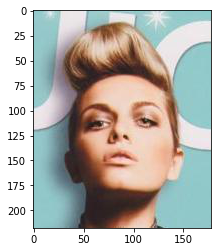

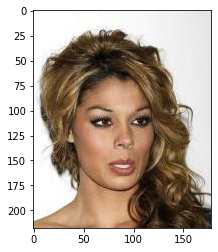

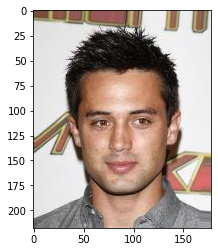

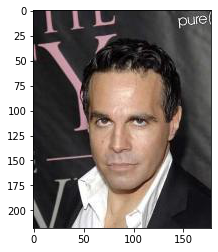

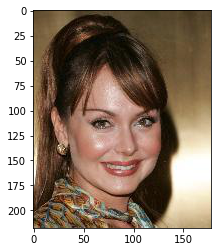

In [6]:
#Visualize the first 10 images of the dataset
im0 = '/content/celeb/img_align_celeba'
for i in range(1, 10):
  im = Image.open(im0+'/00000'+str(i)+'.jpg')
  plt.imshow(im)
  plt.show()

Apply transformation and upload the images into the data loader

In [6]:
transform = transforms.Compose([
                                    transforms.Resize((64, 64)), #resize images to 64x64
                                    transforms.ToTensor(), 
                                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))] #image = (image - mean[1st parameter]) / std[2nd parameter]: the parameters mean, std are passed as 0.5, 0.5 in your case. This will normalize the image in the range [-1,1]. For example, the minimum value 0 will be converted to (0-0.5)/0.5=-1, the maximum value of 1 will be converted to (1-0.5)/0.5=1
                                  )
    
#Defining the batch size: as usual a multiple of 2 is chosen
batch_size = 128

image_folders = 'celeb'

dataset = torchvision.datasets.ImageFolder(image_folders, transform) # generic data loader where the images are arranged


print("\u001b[31m")

#dataset = torchvision.datasets.CelebA(root='.', download=True, transform=transform)   #I can't use this because it has a bug: "File is not a zip file" --> issue of pytorch


data_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                        shuffle=True, num_workers=2)        #shuffle=True-->data reshuffled at every epoch; num_workers-->how many subprocesses to use for data loading
print("[OK] Dataset created")


[OK] Dataset created


## Device configuration

In [7]:
device = torch.device("cuda:0" if (torch.cuda.is_available()) else "cpu")
print("\u001b[31mThe device assigned is:")
print(device)
print("\u001b[31m[OK] Device configured successfully")

The device assigned is:
cuda:0
[OK] Device configured successfully


##Functions

Define two useful functions: weights initializer and a counter for the number of parameters in the architectures. The first one is used to avoid "random" starts of the parameters.

In [8]:
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)


#Number of parameters
def count_parameters(model):
    return sum(p.numel() for p in model.parameters())


print("\u001b[31m[OK] Functions defined successfully")

[OK] Functions defined successfully


## GANs

In [9]:
# Generator Code

class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            # the first parameter in input is Z, going into a convolution
            nn.ConvTranspose2d(128, 512, 4, 1, 0, bias=False),      #ConvTranspose2d(in_channels, out_channels, kernel_size, stride, padding) This module can be seen as the gradient of Conv2d with respect to its input
            nn.BatchNorm2d(512),                                    #BatchNorm2d(num_features)
            nn.ReLU(True),                                          #Rectified linear unit, inplace --> can optionally do the operation in-place.
            # state size --> 512 x 4 x 4
            nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(True),
            # state size --> 256 x 8 x 8
            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            # state size --> 128 x 16 x 16
            nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            # state size. 64 x 32 x 32
            nn.ConvTranspose2d(64, 3, 4, 2, 1, bias=False),
            nn.Tanh()                                               #Activation function
            # state size --> 3 x 64 x 64
        )

    def forward(self, input):
        return self.main(input)

In [17]:
# Create the generator
netG = Generator().to(device)

netG.apply(weights_init)
print("\u001b[31mThe number of parameters in the network is:", count_parameters(netG))
#Print the model
print('\u001b[31m[OK]', netG)

The number of parameters in the network is: 3806080
[OK] Generator(
  (main): Sequential(
    (0): ConvTranspose2d(128, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2

In [11]:
#Discriminator code

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            # input is 3 x 64 x 64
            nn.Conv2d(3, 64, 4, 2, 1),         #Applies a 2D convolution over an input signal composed of several input planes. Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0
            nn.LeakyReLU(0.2, inplace=True),   #Applies the element-wise function: (negative_slope, in-place) --> LeakyReLU(x) = max(0,x) + negative_slope∗min(0,x)
            # state size --> 64 x 32 x 32
            nn.Conv2d(64, 128, 4, 2, 1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            # state size --> 128 x 16 x 16
            nn.Conv2d(128, 256, 4, 2, 1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
            # state size --> 256 x 8 x 8
            nn.Conv2d(256, 512, 4, 2, 1),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. 512 x 4 x 4
            nn.Conv2d(512, 1, 4, 1, 0),
            #1st POSSIBLE MODIFICATION --> hide Sigmoid activation function!
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input)

In [16]:
# Create the Discriminator
netD = Discriminator().to(device)

netD.apply(weights_init)
# Count the parameters
print("\u001b[31mThe number of parameters in the network is:", count_parameters(netD))
#Print the model
print('\u001b[31m[OK]', netD)

The number of parameters in the network is: 2766529
[OK] Discriminator(
  (main): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1))
    (12): Sigmoid()
  )
)


## Training

In [18]:
# Loss function
# 2nd POSSIBLE MODIFICATION --> change the loss function depending on the type of GAN chosen 
# BCE for DCGAN, MSE for LSGAN, BCEWithLogitsLoss for Relativistic GAN
criterion = nn.BCELoss()

# Create batch of latent vectors that I will use to visualize the images generated
fixed_noise = torch.randn(64, 128, 1, 1, device=device)    #rand(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False

# Same optimizer for generator and discriminator
# 3rd POSSIBLE MODIFICATION --> change optimizer/learning rate value
gen_optimizer = optim.Adam(netG.parameters(), lr=0.0003, betas=(0.5, 0.9))
disc_optimizer = optim.Adam(netD.parameters(), lr=0.0003, betas=(0.5, 0.9))

print('\u001b[31m[OK] Parameters are: \n', criterion, '\n', gen_optimizer)
print('\u001b[31m[OK]Everything is set! Ready to go..')


[OK] Parameters are: 
 BCELoss() 
 Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.5, 0.9)
    eps: 1e-08
    lr: 0.0003
    maximize: False
    weight_decay: 0
)
[OK]Everything is set! Ready to go..


Start the training.. remember set the number of epochs and eventually the pre-trained weights and where to save the weights of the last epoch.

In [19]:
# set to training mode
netG.train()
netD.train()

# variables used to save stuff during training
img_list = []
gen_loss_avg = []
disc_loss_avg = []

#Initialize number of epochs!
num_epochs = 5


# this is how the GAN parameters can be loaded:
#netG.load_state_dict(torch.load('/content/drive/MyDrive/VP Project/RG/sgd/gen.pth'))
#netD.load_state_dict(torch.load('/content/drive/MyDrive/VP Project/RG/sgd/disc.pth'))


print('\u001b[31m')
print('Training started ...')

for epoch in range(num_epochs):
    # 0 is the last element of the list, it will be summed to the loss value at every iteration..
    gen_loss_avg.append(0)
    disc_loss_avg.append(0)
    num_batches = 0
    
    for image_batch, _ in data_loader:

        # get dataset image and create real and fake labels for use in the loss
        image_batch = image_batch.to(device)
        label_real = torch.ones(image_batch.size(0), device=device)   #tensor of size [batch_size] all ones
        label_fake = torch.zeros(image_batch.size(0), device=device)  #tensor of size [batch_size] all zeros

      
        ##########   TRAIN GENERATOR      ##########
        # to output an image that is classified as real
        gen_optimizer.zero_grad()

        # generate a batch of images from samples of the latent prior
        latent = torch.randn(image_batch.size(0), 128, 1, 1, device=device)   #torch.Size([128, 128, 1, 1])-->Returns a tensor filled with random numbers from a normal distribution with mean 0 and variance 1
        fake_image_batch = netG(latent)                                       #torch.Size([128, 3, 64, 64])
        
        real_pred = netD(image_batch).squeeze() 
        fake_pred = netD(fake_image_batch).squeeze()                         #tensor of size 128 with fake_prediction--> squeeze Returns a tensor with all the dimensions of input of size 1 removed: from [128, 1, 1, 1] to [128]
        
        gen_loss = criterion(fake_pred, label_real)

        #UNCOMMENT TO USE RELATIVISTIC GAN
        #gen_loss = criterion(fake_pred - real_pred, label_real)             #fake_pred - real_pred --> difference between two tensor of size 128

        gen_loss.backward()
        gen_optimizer.step()

        
        ##########   TRAIN DISCRIMINATOR      ##########
        #to correctly classify real and fake
        # (detach the computation graph of the generator and the discriminator,
        # so that gradients are not backpropagated into the generator)
        disc_optimizer.zero_grad()

        real_pred = netD(image_batch).squeeze()                               #tensor of size 128 with real_prediction--> squeeze Returns a tensor with all the dimensions of input of size 1 removed: from [128, 1, 1, 1] to [128]
        fake_pred = netD(fake_image_batch.detach()).squeeze()

        disc_loss = 0.5 * (
            criterion(real_pred, label_real) +
            criterion(fake_pred, label_fake))
        
        #UNCOMMENT TO USE RELATIVISTIC GAN
        #disc_loss = 0.5 * (
            #criterion(real_pred - fake_pred, label_real) +
            #criterion(fake_pred - real_pred, label_fake))
        
        
        disc_loss.backward()
        disc_optimizer.step()
        
        
        #sum all the losses at the given epoch then divide by the number of iterations (num_batches)
        gen_loss_avg[-1] += gen_loss.item()
        disc_loss_avg[-1] += disc_loss.item()
        num_batches += 1
        
    gen_loss_avg[-1] /= num_batches
    disc_loss_avg[-1] /= num_batches
    print('Epoch [%d / %d] Average loss GEN vs. DIS.: %f vs. %f' %
          (epoch+1, num_epochs, gen_loss_avg[-1], disc_loss_avg[-1]))
    
    #Save images inside the list!
    with torch.no_grad():
        fake = netG(fixed_noise).detach().cpu()
    img_list.append(vutils.make_grid(fake, padding=2, normalize=True))



# At the end save parameters           
# this is how the GAN parameters can be saved:
#torch.save(netG.state_dict(), '/content/drive/MyDrive/VP Project/RG/sgd/gen.pth')
#torch.save(netD.state_dict(), '/content/drive/MyDrive/VP Project/RG/sgd/disc.pth')



Training started ...
Epoch [1 / 5] Average loss GEN vs. DIS.: 4.771558 vs. 0.373567
Epoch [2 / 5] Average loss GEN vs. DIS.: 2.918855 vs. 0.321614
Epoch [3 / 5] Average loss GEN vs. DIS.: 2.609064 vs. 0.346701
Epoch [4 / 5] Average loss GEN vs. DIS.: 2.160535 vs. 0.404549
Epoch [5 / 5] Average loss GEN vs. DIS.: 2.053635 vs. 0.400926


## Plot the results

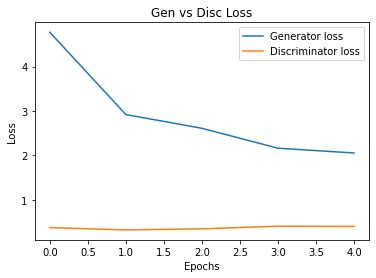

In [20]:
#Plotting loss
plt.plot(gen_loss_avg, label='Generator loss')
plt.plot(disc_loss_avg, label='Discriminator loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Gen vs Disc Loss')
plt.legend()

##Visualize the results
First thing is visualize the progression of the images generated.

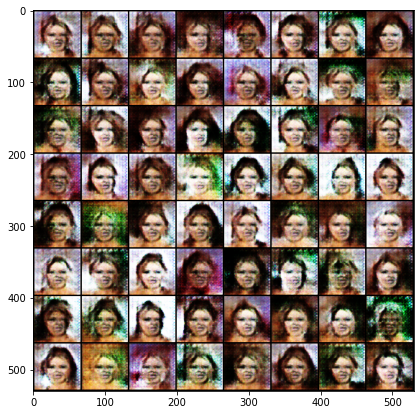

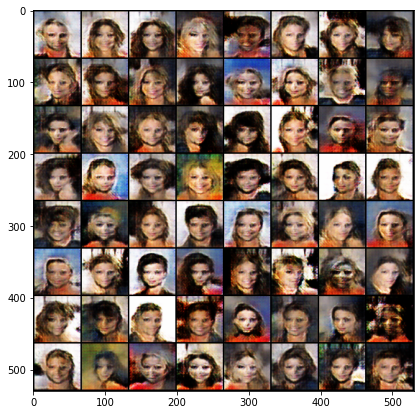

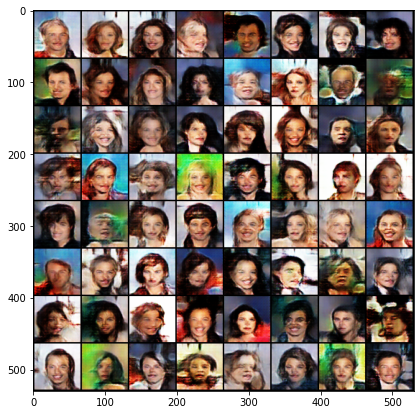

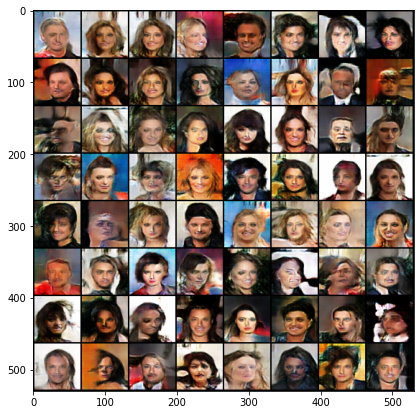

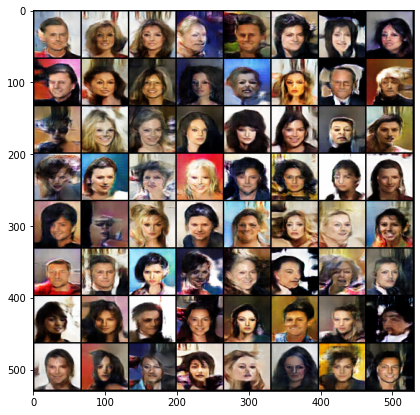

In [21]:
for i in img_list:
  plt.figure(figsize=(7,7))
  plt.imshow(np.transpose(i, (1,2,0)))    #from torch.Size([3, 530, 530]) to --> torch.Size([530, 530, 3]).. 530 is 64*8+2*9 --> (im_size*num_rows + padding*(num_rows+1))
  plt.show()

Then compare the last set of images generated with a real batch.

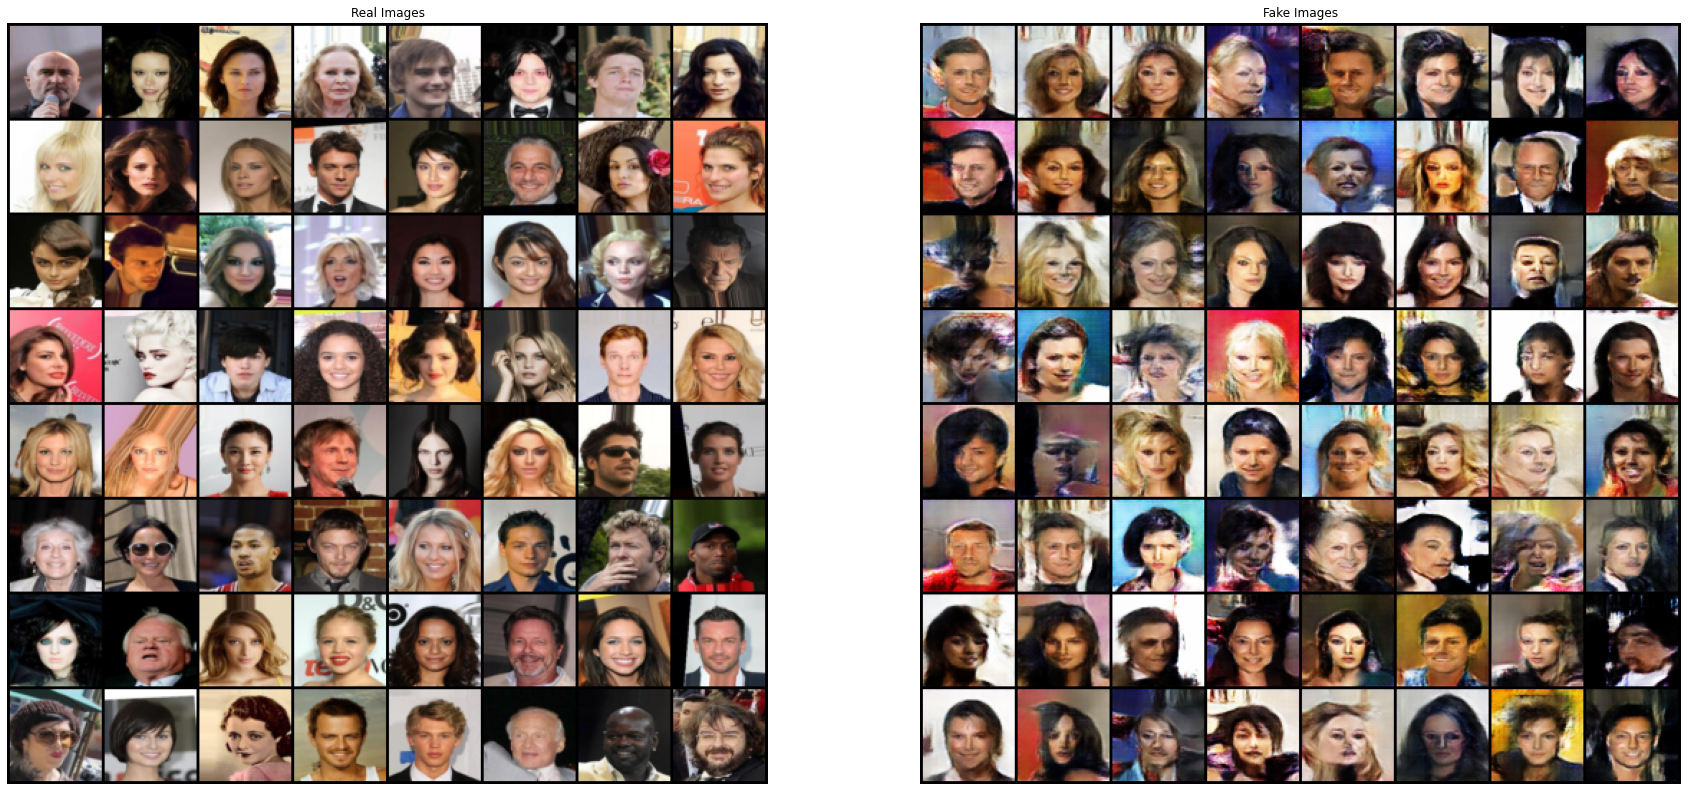

In [22]:
# Grab a batch of real images from the dataloader
real_batch = next(iter(data_loader))

# Plot the real images
plt.figure(figsize=(30,30))
plt.subplot(1,2,1)
plt.axis("off")
plt.title("Real Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0))) #Tensor.cpu() to copy the tensor to host memory first.

# Plot the fake images from the last epoch
plt.subplot(1,2,2)
plt.axis("off")
plt.title("Fake Images")
plt.imshow(np.transpose(img_list[-1],(1,2,0)))
plt.show()